<a href="https://colab.research.google.com/github/yurim22/DeepLearning/blob/master/facial_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [110]:
import h5py
s = h5py.File('sample_data/test_happy.h5','r')
for key in s.keys():
    print(key)

list_classes
test_set_x
test_set_y


In [111]:
t = h5py.File('sample_data/train_happy.h5','r')
for key in t.keys():
    print(key)

list_classes
train_set_x
train_set_y


In [112]:
import h5py

train_dataset = h5py.File('sample_data/train_happy.h5','r')
train_x = np.array(train_dataset['train_set_x'][:])
train_y = np.array(train_dataset['train_set_y'][:])

test_dataset = h5py.File('sample_data/test_happy.h5','r')
test_x = np.array(test_dataset['test_set_x'][:])
test_y = np.array(test_dataset['test_set_y'][:])


# y reshaped
train_y = train_y.reshape((train_x.shape[0],1))
test_y = test_y.reshape((test_y.shape[0],1))



In [113]:
print(train_x.shape, test_x.shape)
print(train_y.shape, test_y.shape)

(600, 64, 64, 3) (150, 64, 64, 3)
(600, 1) (150, 1)


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


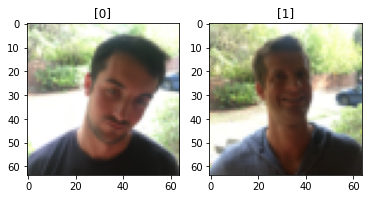

In [114]:
plt.subplot(1, 2, 1)
plt.title(train_y[0])
plt.imshow(train_x[0])
plt.subplot(1, 2, 2)
plt.title(train_y[1])
plt.imshow(train_x[1])


In [115]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        samplewise_center=True,
        samplewise_std_normalization=True,
        brightness_range=[0.5, 1.5],
        horizontal_flip=True)
test_datagen = ImageDataGenerator(
    rescale=1./255,
    samplewise_center=True,
    samplewise_std_normalization=True)

batch_size = 30
train_batch_gen = train_datagen.flow(train_x, train_y, batch_size, shuffle=True)
test_batch_gen = test_datagen.flow(test_x, test_y, batch_size, shuffle=False)

In [126]:

epochs = 20
IMG_HEIGHT = 64
IMG_WIDTH = 64

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)             

In [127]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [121]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)             

In [128]:
history = model.fit_generator(
    train_batch_gen,
    steps_per_epoch=600//batch_size,
    epochs=epochs,
    validation_data=test_batch_gen,
    validation_steps=150 // batch_size
)

Epoch 1/20
20/20 [==============================] - 3s 171ms/step - loss: 0.7015 - accuracy: 0.5000 - val_loss: 0.6710 - val_accuracy: 0.4400
Epoch 2/20
20/20 [==============================] - 3s 166ms/step - loss: 0.6334 - accuracy: 0.5917 - val_loss: 0.5798 - val_accuracy: 0.6733
Epoch 3/20
20/20 [==============================] - 3s 169ms/step - loss: 0.5893 - accuracy: 0.6567 - val_loss: 0.5672 - val_accuracy: 0.6533
Epoch 4/20
20/20 [==============================] - 3s 169ms/step - loss: 0.5127 - accuracy: 0.7433 - val_loss: 0.4669 - val_accuracy: 0.6800
Epoch 5/20
20/20 [==============================] - 3s 170ms/step - loss: 0.4461 - accuracy: 0.7717 - val_loss: 0.3782 - val_accuracy: 0.7267
Epoch 6/20
20/20 [==============================] - 3s 171ms/step - loss: 0.3426 - accuracy: 0.8300 - val_loss: 0.2707 - val_accuracy: 0.8933
Epoch 7/20
20/20 [==============================] - 3s 167ms/step - loss: 0.3128 - accuracy: 0.8433 - val_loss: 0.2306 - val_accuracy: 0.9133
Epoch 

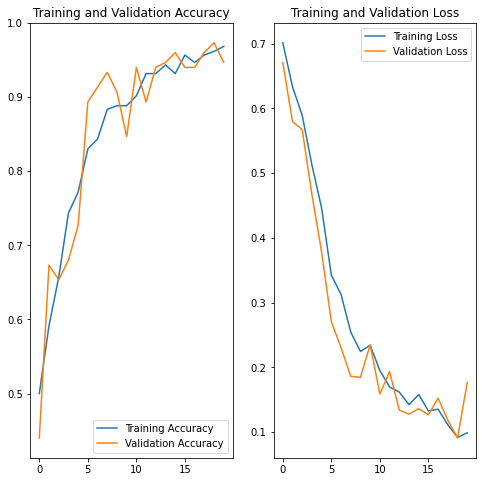

In [129]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [137]:
import PIL
PIL.__version__

from PIL import Image

img_logo_png = Image.open("sample_data/test2.png")
image = img_logo_png.resize((64,64))

cry = Image.open("sample_data/cry2.jpg")
cry_image = cry.resize((64,64))
cry_np = np.array(cry_image)


img_logo_array = np.array(image)
img_array = np.append(img_logo_array, np.array(cry_image))
# plt.imshow(img_array)

res = img_array.reshape(2,64,64,3)
res.shape


(2, 64, 64, 3)

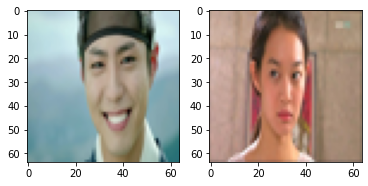

In [138]:
plt.subplot(1, 2, 1)
plt.imshow(res[0])
plt.subplot(1, 2, 2)
plt.imshow(res[1])

In [139]:
predictions = model.predict(res)
print(predictions[0])
print(predictions[1])

[148.01425]
[-161.43086]


In [ ]:
print(val_acc)
print(val_loss)

[0.42500001192092896, 0.5874999761581421, 0.675000011920929, 0.7124999761581421, 0.675000011920929, 0.7250000238418579, 0.737500011920929, 0.7250000238418579, 0.762499988079071, 0.737500011920929, 0.875, 0.8500000238418579, 0.800000011920929, 0.9125000238418579, 0.8500000238418579, 0.925000011920929, 0.8125, 0.9375, 0.887499988079071, 0.9624999761581421]
[0.6837558746337891, 0.6286587715148926, 0.5732495188713074, 0.6497074365615845, 0.5356563329696655, 0.5048071146011353, 0.41472092270851135, 0.4008333683013916, 0.36745843291282654, 0.4649743139743805, 0.2496069222688675, 0.3266860544681549, 0.28057798743247986, 0.22383904457092285, 0.27711161971092224, 0.198440283536911, 0.32579097151756287, 0.17951078712940216, 0.24463434517383575, 0.20031563937664032]
